## T03- Imbalanced data 

The dataset chosen is the well-known Credit Card Fraud , that consists in a set of anonymized credit card transations , that are either labeled as fradulent or genuine.

In fact, the dataset contains only numerical input variables which are the result of a PCA transformation. However, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. The 'Time' feature describes the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /Users/andresilva/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [5]:
import pandas as pd

df = pd.read_csv(path + "/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Understanding the data

The first thing to be done is gather a basic sense of our data. As previosly stated, except for the transaction and amount we dont know what the other columns are (due to privacy reasons). Effectively, the description of the data says that all the features, except for time and amount,  went through a PCA transformation , that is, a Dimensionality Reduction technique, . It is imoportorder to implement a PCA transformation features need to be previously scaled. In this case, all the V features have been scaled (or, at least, it can be presumed that such operation was done).

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum().sum()

np.int64(0)

The dataset does not have any missing values , so , it doesn't need no imputation operations

In [8]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [9]:
df.drop_duplicates(inplace=True)

Firstly, it can be plotted the distribution of the exposed features (that is , both time and Amount):

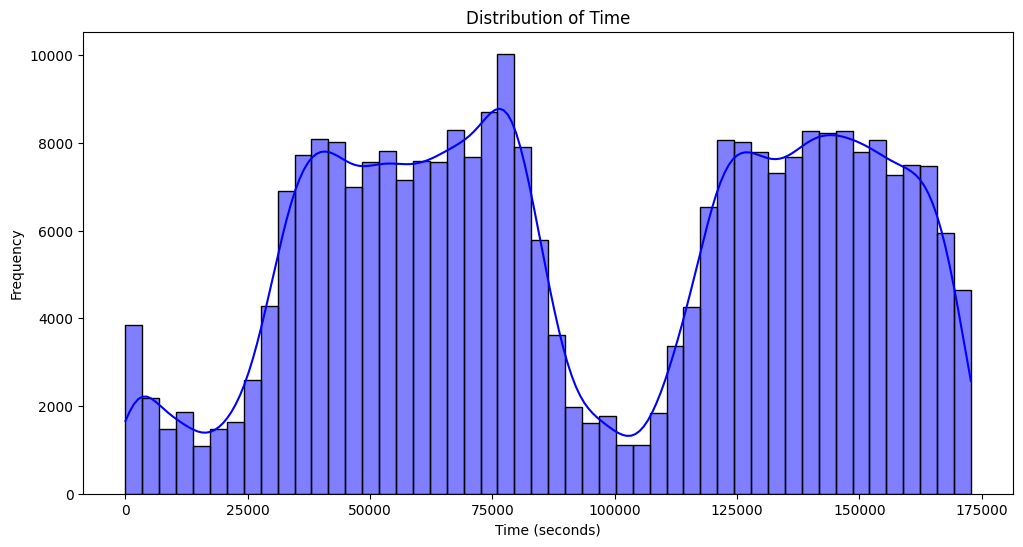

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of 'Time'
plt.figure(figsize=(12, 6))
sns.histplot(df['Time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()



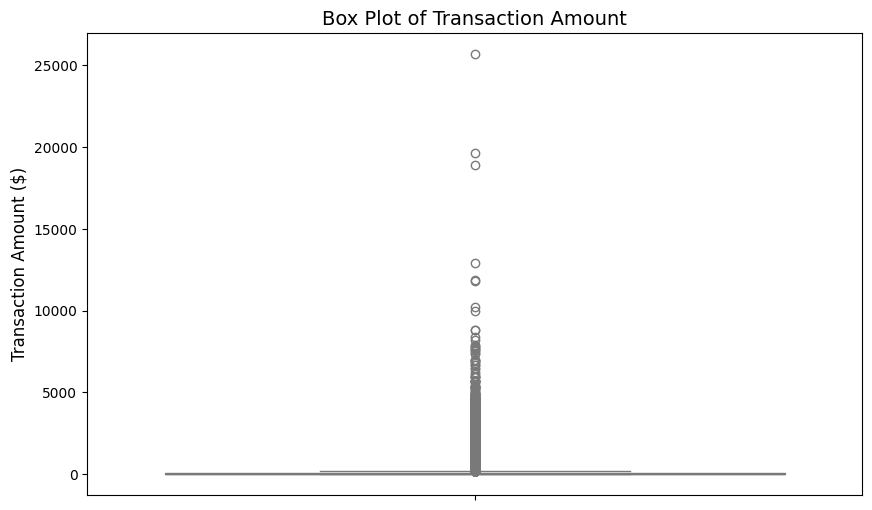

In [11]:
# Box plot of 'Amount' with rotated layout
plt.figure(figsize=(10, 6))  # Adjust figure size to match the rotated plot
sns.boxplot(y=df['Amount'], color='lightblue')  # Use 'y' instead of 'x'
plt.title('Box Plot of Transaction Amount', fontsize=14)
plt.ylabel('Transaction Amount ($)', fontsize=12)
plt.xlabel('')  # Remove x-axis label as it's unnecessary for the rotated view
plt.xticks(rotation=0)  # No rotation needed for x-axis ticks in this orientation
plt.yticks(rotation=0)  # Keep y-axis ticks horizontal
plt.show()

In [12]:
df['Amount'].skew()

np.float64(16.978803370060476)

In [13]:
df['Amount'].kurt()

np.float64(844.471319490649)

Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)

In [14]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['Amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

#df.drop(['Time','Amount'], axis=1, inplace=True)

Next, as it was already expected that this dataset is , in fact, imbalanced, it is important to check the distribution of the target variable, that is, the 'Class' Variable:


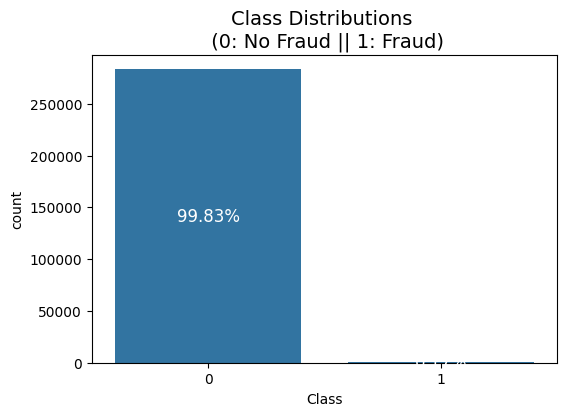

Class Distribution Percentages:
Class 0: 99.83328986416473%
Class 1: 0.1667101358352777%


In [20]:
plt.figure(figsize=(6, 4))

# Create the count plot
sns.countplot(x='Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

# Calculate percentages
class_counts = df['Class'].value_counts()
total = len(df)
percentages = (class_counts / total) * 100

# Add percentages inside the bars
for i, count in enumerate(class_counts):
    percentage = percentages[i]
    plt.text(i, count / 2, f'{percentage:.2f}%', ha='center', va='center', color='white', fontsize=12)

plt.show()

# Print the percentages
print("Class Distribution Percentages:")
for label, percentage in percentages.items():
    print(f"Class {label}: {percentage}%")

## Measuring Performance Metrics

### Splitting Data into Training and Test Sets

In [ ]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
save_data = False
if save_data:
    # Splitting the data
    X_, y_ = df.drop(columns=['Class']), df['Class']
    X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
        X_, y_, test_size=0.2,stratify=y_, random_state=42
    )
    
    # Saving the data to files
    with open('X_train_final.pkl', 'wb') as f:
        pickle.dump(X_train_final, f)
    with open('X_test_final.pkl', 'wb') as f:
        pickle.dump(X_test_final, f)
    with open('y_train_final.pkl', 'wb') as f:
        pickle.dump(y_train_final, f)
    with open('y_test_final.pkl', 'wb') as f:
        pickle.dump(y_test_final, f)

else:
    # Loading the data from files
    with open('X_train_final.pkl', 'rb') as f:
        X_train_final = pickle.load(f)
    with open('X_test_final.pkl', 'rb') as f:
        X_test_final = pickle.load(f)
    with open('y_train_final.pkl', 'rb') as f:
        y_train_final = pickle.load(f)
    with open('y_test_final.pkl', 'rb') as f:
        y_test_final = pickle.load(f)

# Check class distribution in the train set
train_class_distribution = y_train_final.value_counts(normalize=True) * 100
print("Class distribution in the training set (%):")
print(train_class_distribution)

# Check class distribution in the test set
test_class_distribution = y_test_final.value_counts(normalize=True) * 100
print("\nClass distribution in the test set (%):")
print(test_class_distribution)

Class distribution in the training set (%):
Class
0    99.833466
1     0.166534
Name: proportion, dtype: float64

Class distribution in the test set (%):
Class
0    99.832587
1     0.167413
Name: proportion, dtype: float64


In [22]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_model_metrics(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    f1_macro = f1_score(true_labels, predicted_labels, average='macro')
    precision_macro = precision_score(true_labels, predicted_labels, average='macro')
    recall_macro = recall_score(true_labels, predicted_labels, average='macro')
    f1_classwise = f1_score(true_labels, predicted_labels, average=None)
    precision_classwise = precision_score(true_labels, predicted_labels, average=None)
    recall_classwise = recall_score(true_labels, predicted_labels, average=None)

    return {
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_classwise': f1_classwise,
        'precision_classwise': precision_classwise,
        'recall_classwise': recall_classwise
    }

In [23]:
from sklearn.metrics import classification_report
def classification_results(model, y_true_final, y_pred_final):
    # Integrate into cross-validation loop
    '''
    y_true_final, y_pred_final = cross_validation_loop_single_model(
        model, skf, X_train, y_train
    )
    '''
    # Evaluate metrics
    single_model_metrics = evaluate_model_metrics(y_true_final, y_pred_final)
    print("Overall Metrics:")
    print(f"Accuracy: {single_model_metrics['accuracy']:.4f}")
    print(f"F1 Macro: {single_model_metrics['f1_macro']:.4f}")
    print(f"Precision Macro: {single_model_metrics['precision_macro']:.4f}")
    print(f"Recall Macro: {single_model_metrics['recall_macro']:.4f}")

    print("\nClasswise Metrics:")
    for cls_idx, (f1, precision, recall) in enumerate(zip(
        single_model_metrics['f1_classwise'],
        single_model_metrics['precision_classwise'],
        single_model_metrics['recall_classwise']
    )):
        print(f"Class {cls_idx}:")
        print(f"  F1: {f1:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
    y_test_pred = model.predict(X_test_final)
    print("\nTest Set Evaluation:")
    print("Classification Report:")
    print(classification_report(y_test_final, y_test_pred)) ## ValueError: Found input variables with inconsistent numbers of samples: [77254, 14438]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

for name, model in classifiers.items():
    print(f"Training {name}...")
    model.fit(X_train_final, y_train_final)
    print(f"Evaluation {name}...")
    classification_results(model, y_test_final, model.predict(X_test_final))
    print("\n")

Training LogisiticRegression...
Evaluation LogisiticRegression...
Overall Metrics:
Accuracy: 0.9991
F1 Macro: 0.8476
Precision Macro: 0.9239
Recall Macro: 0.7946

Classwise Metrics:
Class 0:
  F1: 0.9996
  Precision: 0.9993
  Recall: 0.9998
Class 1:
  F1: 0.6957
  Precision: 0.8485
  Recall: 0.5895

Test Set Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.59      0.70        95

    accuracy                           1.00     56746
   macro avg       0.92      0.79      0.85     56746
weighted avg       1.00      1.00      1.00     56746



Training KNearest...
Evaluation KNearest...
Overall Metrics:
Accuracy: 0.9995
F1 Macro: 0.9120
Precision Macro: 0.9855
Recall Macro: 0.8579

Classwise Metrics:
Class 0:
  F1: 0.9997
  Precision: 0.9995
  Recall: 1.0000
Class 1:
  F1: 0.8242
  Precision: 0.9714
  Recall: 0.7158

Test Set Evaluation:
Classification Report:
   

## ** Exploring Undersampling and Oversampling Approaches**

The [imbalanced-learn](https://imbalanced-learn.org/stable/index.html) toolbox offers a variety of implementations that corresponds to balancing techiques. In order to employ them in a more legible way, a set of wrapper functions were defined, each one corresponding to a sampling approach.

In [27]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [29]:
def random_undersampling(X, y):
    """Undersamples the training data (X) according to RUS."""
    generator = RandomUnderSampler(random_state=42)
    X_res, y_res = generator.fit_resample(X, y)
    return X_res, y_res


def random_oversampling(X, y):
    """Oversamples the training data (X) according to ROS."""
    generator = RandomOverSampler(random_state=42)
    X_res, y_res = generator.fit_resample(X, y)
    return X_res, y_res


def smote_oversampling(X, y, k=5):
    """Applies the SMOTE technique on the training data (X)."""
    generator = SMOTE(random_state=42, k_neighbors=k)
    X_res, y_res = generator.fit_resample(X, y)
    return X_res, y_res

### **3.1. Exploring Random Undersampling (RUS)**

In what follows, we will repeat the previous steps (fitting a classifier and evaluating performance) using different resampling techniques to tackle the class imbalance problem before model training. We start with **RandomUndersampling**, which randomly removes some of the majority class examples to achieve prevalence parity:

In [30]:
from collections import Counter

# Perform Random Undersampling
X_train_rus, y_train_rus = random_undersampling(X_train_final, y_train_final)

print("Shape of X_train: ", X_train_final.shape)
print("Distribution of original training data: ", Counter(y_train_final))

print("Shape of X_train_rus: ", X_train_rus.shape)
print("Distribution of undersampled training data: ", Counter(y_train_rus))

Shape of X_train:  (226980, 30)
Distribution of original training data:  Counter({0: 226602, 1: 378})
Shape of X_train_rus:  (756, 30)
Distribution of undersampled training data:  Counter({0: 378, 1: 378})


Since the original training set consisted of **378 minority class examples** and **226980 majority class examples**, RUS randomly removes some majority class examples to keep only **378 majority examples** as well. The undersampled dataset now comprises 300 examples with balanced class priors.

In [31]:
for name, model in classifiers.items():
    print(f"Training {name}...")
    model.fit(X_train_rus, y_train_rus)
    print(f"Evaluation {name}...")
    classification_results(model, y_test_final, model.predict(X_test_final))
    print("\n")

Training LogisiticRegression...
Evaluation LogisiticRegression...
Overall Metrics:
Accuracy: 0.9730
F1 Macro: 0.5421
Precision Macro: 0.5258
Recall Macro: 0.9234

Classwise Metrics:
Class 0:
  F1: 0.9863
  Precision: 0.9998
  Recall: 0.9732
Class 1:
  F1: 0.0978
  Precision: 0.0518
  Recall: 0.8737

Test Set Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.98     56746



Training KNearest...
Evaluation KNearest...
Overall Metrics:
Accuracy: 0.9764
F1 Macro: 0.5480
Precision Macro: 0.5287
Recall Macro: 0.9146

Classwise Metrics:
Class 0:
  F1: 0.9880
  Precision: 0.9997
  Recall: 0.9766
Class 1:
  F1: 0.1079
  Precision: 0.0576
  Recall: 0.8526

Test Set Evaluation:
Classification Report:
   

In [35]:
# Perform Random Undersampling
X_train_ros, y_train_ros = random_oversampling(X_train_final, y_train_final)

print("Shape of X_train: ", X_train_final.shape)
print("Distribution of original training data: ", Counter(y_train_final))

print("Shape of X_train_rus: ", X_train_ros.shape)
print("Distribution of undersampled training data: ", Counter(y_train_ros))

Shape of X_train:  (226980, 30)
Distribution of original training data:  Counter({0: 226602, 1: 378})
Shape of X_train_rus:  (453204, 30)
Distribution of undersampled training data:  Counter({0: 226602, 1: 226602})


In [ ]:
for name, model in classifiers.items():
    print(f"Training {name}...")
    model.fit(X_train_ros, y_train_ros)
    print(f"Evaluation {name}...")
    classification_results(model, y_test_final, model.predict(X_test_final))
    print("\n")

Training LogisiticRegression...
Evaluation LogisiticRegression...
Overall Metrics:
Accuracy: 0.9755
F1 Macro: 0.5472
Precision Macro: 0.5283
Recall Macro: 0.9247

Classwise Metrics:
Class 0:
  F1: 0.9876
  Precision: 0.9998
  Recall: 0.9757
Class 1:
  F1: 0.1068
  Precision: 0.0568
  Recall: 0.8737

Test Set Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746



Training KNearest...
Evaluation KNearest...
Overall Metrics:
Accuracy: 0.9991
F1 Macro: 0.8748
Precision Macro: 0.8570
Recall Macro: 0.8945

Classwise Metrics:
Class 0:
  F1: 0.9996
  Precision: 0.9996
  Recall: 0.9995
Class 1:
  F1: 0.7500
  Precision: 0.7143
  Recall: 0.7895

Test Set Evaluation:
Classification Report:
   

In [ ]:
# Applying SMOTE
X_train_smote, y_train_smote = smote_oversampling(X_train, y_train, k=2)

print("Shape of X_train: ", X_train.shape)
print("Distribution of original training data: ", Counter(y_train))

print("Shape of X_train_smote: ", X_train_smote.shape)
print("Distribution of oversampled training data: ", Counter(y_train_smote))


In [ ]:
for name, model in classifiers.items():
    print(f"Training {name}...")
    model.fit(X_train_ros, y_train_ros)
    print(f"Evaluation {name}...")
    classification_results(model, y_test_final, model.predict(X_test_final))
    print("\n")